In [13]:
import pandas as pd
import numpy as np
from collections import defaultdict


counts_by_interaction = []

def compute(project: str):

    count_by_interaction_type = {'additive': 0, 'competing': 0, 'xor': 0}

    for interaction_type in count_by_interaction_type.keys():
        df = pd.read_csv(f'../analyzed_interactions/{project}/{interaction_type}.csv')

        string_interactions = set(df[df['string_interaction_evidence'].notna()]['interaction'].values)
        biogrid_interactions = set(df[df['biogrid_interaction_evidence'] > 0]['interaction'].values)
        total = string_interactions.union(biogrid_interactions)

        count_by_interaction_type[interaction_type] = len(total)

    count_by_interaction_type["project"] = project
    counts_by_interaction.append(count_by_interaction_type)

    print(f"{project}, {count_by_interaction_type}, total:{sum(list(count_by_interaction_type.values())[:-1])}")
    


DATASETS = [
    "METABRIC",
    "BLCA",
    'BRCA',
    "CESC",
    "COAD",
    "GBM",
    "HNSC",
    "KIRC",
    "KIRP",
    "LAML",
    "LGG",
    "LIHC",
    "LUAD",
    "LUSC",
    "OV",
    "PRAD",
    "READ",
    "SKCM",
    "STAD",
    "THCA",
    "UCEC",
]

for project in DATASETS:
    compute(project)

METABRIC, {'additive': 11, 'competing': 18, 'xor': 14, 'project': 'METABRIC'}, total:43
BLCA, {'additive': 5, 'competing': 15, 'xor': 11, 'project': 'BLCA'}, total:31
BRCA, {'additive': 8, 'competing': 16, 'xor': 10, 'project': 'BRCA'}, total:34
CESC, {'additive': 10, 'competing': 18, 'xor': 15, 'project': 'CESC'}, total:43
COAD, {'additive': 10, 'competing': 18, 'xor': 6, 'project': 'COAD'}, total:34
GBM, {'additive': 7, 'competing': 9, 'xor': 7, 'project': 'GBM'}, total:23
HNSC, {'additive': 7, 'competing': 34, 'xor': 16, 'project': 'HNSC'}, total:57
KIRC, {'additive': 6, 'competing': 35, 'xor': 16, 'project': 'KIRC'}, total:57
KIRP, {'additive': 15, 'competing': 16, 'xor': 11, 'project': 'KIRP'}, total:42
LAML, {'additive': 12, 'competing': 14, 'xor': 12, 'project': 'LAML'}, total:38
LGG, {'additive': 8, 'competing': 18, 'xor': 7, 'project': 'LGG'}, total:33
LIHC, {'additive': 9, 'competing': 2, 'xor': 8, 'project': 'LIHC'}, total:19
LUAD, {'additive': 7, 'competing': 12, 'xor': 10,

In [4]:
from collections import defaultdict
import gzip

l1000_genes = []
string_ids = []

with open('../data/L1000_to_STRING.txt', 'r') as file:
    for line in file:
        gene, string_id = line.rstrip().split('\t')
        l1000_genes.append(gene)
        string_ids.append(string_id)


string_interactions = {}

with gzip.open('../data/9606.protein.links.detailed.v11.5.txt.gz', 'rt') as f:
    # header
    f.readline()
    
    # for fast search
    _string_ids = set(string_ids)

    for line in f:
        columns = line.strip().split(' ')
        if columns[0] in _string_ids and columns[1] in _string_ids:
            string_interactions[(columns[0], columns[1])] = float(columns[-1])

gene_to_stringId = dict(zip(l1000_genes, string_ids))


biogrid_interactions = defaultdict(int)
with open('../data/BIOGRID-ORGANISM-Homo_sapiens-4.4.221.tab', 'r') as f:
    # header
    f.readline()

    g1, g2 = 7, 8
    for line in f:
        line = line.split('\t')
        biogrid_interactions[(line[g1], line[g2])] += 1

In [5]:
import random
import pandas as pd

random_interactions_dist = []

for i in range(10_000):
    random_interactions = []
    
    for _ in range(100):
        gene1, gene2 = random.sample(l1000_genes, 2)

        stringId1 = gene_to_stringId[gene1]
        stringId2 = gene_to_stringId[gene2]

        string_interaction_evidence = string_interactions.get((stringId1, stringId2), None)
        biogrid_interaction_evidence = biogrid_interactions.get((gene1, gene2), 0) + biogrid_interactions.get((gene2, gene1), 0)

        random_interactions.append((f'{gene1}*{gene2}',string_interaction_evidence,biogrid_interaction_evidence))

    df = pd.DataFrame(random_interactions, columns=['interaction', 'string_interaction_evidence', 'biogrid_interaction_evidence'])
    df_string_interactions = set(df[df['string_interaction_evidence'].notna()]['interaction'].values)
    df_biogrid_interactions = set(df[df['biogrid_interaction_evidence'] > 0]['interaction'].values)


    # print(len(set(df_string_interactions)) , len((df_biogrid_interactions)))

    total = df_string_interactions.union(df_biogrid_interactions)
    random_interactions_dist.append(len(total))


    # df.to_csv(f'../data/interactions_literature/RANDOMS/random_{i}.csv', index=False)

In [24]:
data = pd.DataFrame({
    key: [d[key] for d in counts_by_interaction]
    for key in counts_by_interaction[0].keys()
})

y_point_dict = {i: 0 for i in range(37)}

point_coordinates = [] # (id, type, x, y)
for interaction_type in data.columns[:-1]:
    values = data[interaction_type].values

    for i, x in enumerate(values):
        point_coordinates += [(i, interaction_type, x, y_point_dict[x])]
        y_point_dict[x] += 1

point_coordinates

[(0, 'additive', 11, 0),
 (1, 'additive', 5, 0),
 (2, 'additive', 8, 0),
 (3, 'additive', 10, 0),
 (4, 'additive', 10, 1),
 (5, 'additive', 7, 0),
 (6, 'additive', 7, 1),
 (7, 'additive', 6, 0),
 (8, 'additive', 15, 0),
 (9, 'additive', 12, 0),
 (10, 'additive', 8, 1),
 (11, 'additive', 9, 0),
 (12, 'additive', 7, 2),
 (13, 'additive', 15, 1),
 (14, 'additive', 7, 3),
 (15, 'additive', 7, 4),
 (16, 'additive', 11, 1),
 (17, 'additive', 9, 1),
 (18, 'additive', 13, 0),
 (19, 'additive', 4, 0),
 (20, 'additive', 7, 5),
 (0, 'competing', 18, 0),
 (1, 'competing', 15, 2),
 (2, 'competing', 16, 0),
 (3, 'competing', 18, 1),
 (4, 'competing', 18, 2),
 (5, 'competing', 9, 2),
 (6, 'competing', 34, 0),
 (7, 'competing', 35, 0),
 (8, 'competing', 16, 1),
 (9, 'competing', 14, 0),
 (10, 'competing', 18, 3),
 (11, 'competing', 2, 0),
 (12, 'competing', 12, 1),
 (13, 'competing', 13, 1),
 (14, 'competing', 13, 2),
 (15, 'competing', 11, 2),
 (16, 'competing', 11, 3),
 (17, 'competing', 14, 1),
 (1

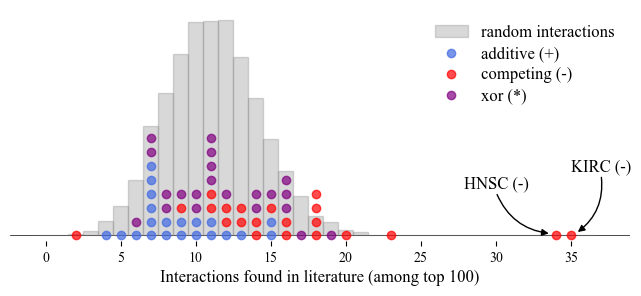

In [80]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.patches import FancyArrowPatch

plt.rcParams["font.family"] = "Times New Roman"

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 3))

for loc in ["top", "right", "left", "bottom"]:
    ax.spines[loc].set_visible(False)

ax.hist(random_interactions_dist, density=True, alpha=0.3, color="gray", edgecolor = 'gray', bins = 37, range=(-0.5, 36.5), zorder=1, label="random interactions");
ax.axhline(0, color='black', linewidth=0.5, zorder=0)

# add points
Y_UNIT = 0.008
interaction_color = {
    "additive": "royalblue",
    "competing": "red",
    "xor": "purple",
}
interaction_label = {
    "additive": "additive (+)",
    "competing": "competing (-)",
    "xor": "xor (*)",
}

for id, int_type, x, y in point_coordinates:
    ax.scatter(x, y*Y_UNIT, c=interaction_color[int_type], label=interaction_label[int_type] if id == 0 else None, alpha=0.7)

# curve for HNSC
arrow = FancyArrowPatch((30, 0.025), (33.7, 0.001), arrowstyle="-|>", mutation_scale=10, 
                        connectionstyle="arc3,rad=0.3", color='k')
ax.add_patch(arrow)
ax.text(30, 0.025, "HNSC (-)", fontsize=12, verticalalignment="bottom", horizontalalignment="center")

# curve for KIRC
arrow = FancyArrowPatch((37, 0.035), (35.3, 0.001), arrowstyle="-|>", mutation_scale=10, 
                        connectionstyle="arc3,rad=-0.3", color='k')
ax.add_patch(arrow)
ax.text(37, 0.035, "KIRC (-)", fontsize=12, verticalalignment="bottom", horizontalalignment="center")





ax.set_ylim(bottom=-0.003)

ax.set_xlabel('Interactions found in literature (among top 100)', fontsize=12)
#ax.set_ylabel('Density', fontsize=12)
ax.set_yticks([])
ax.legend(frameon=False, fontsize=12, labelspacing=0.3)

f.savefig("../figures/figure6-interaction-in-literature.pdf", dpi=500, bbox_inches="tight")